# Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [23]:
dataset = pd.read_csv('HousingData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [ ]:
print(X)

In [ ]:
print(y)

# Taking care of missing data

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])

# Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Simple Linear Regression model on the Training set

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Print the model's coefficients and intercept

In [28]:
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [-1.26194005e-01  3.76363553e-02 -6.26295345e-02  2.70382928e+00
 -1.45015824e+01  4.08006958e+00 -2.11509464e-02 -1.41798662e+00
  1.96343241e-01 -8.70651696e-03 -1.01396225e+00  8.29504244e-03
 -4.19861039e-01]
Intercept: 35.04016602948735


# Predicting the Test set results

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
print(y_pred)

[26.175296   22.64747588 29.1456294  11.52971235 21.65312134 19.42320699
 20.18413017 21.46914355 19.1985363  19.98228162  4.32483046 16.16891668
 16.87682404  5.31232373 39.36827861 33.09358732 21.9152876  36.61918436
 31.52676377 23.52713482 24.96022461 23.69866912 20.88033802 30.55074901
 22.74081741  8.66805959 17.65119072 17.93088633 36.01223185 21.16299556
 17.83464361 17.43306603 19.5240167  23.50605522 28.97262793 19.21808862
 11.23997435 23.94256597 17.86786717 15.40849806 26.3630836  21.5193299
 23.78733694 14.84041522 23.9445175  24.97067627 20.11366175 23.08636158
 10.42208266 24.52832122 21.60847326 18.66228165 24.53362832 31.03502944
 12.97457826 22.38536236 21.34822822 16.10928673 12.37477824 22.78596712
 18.28714824 21.91802045 32.49771603 31.21256855 17.47867791 33.18861907
 19.17896285 19.94662594 20.17142015 23.90228857 22.81288844 24.17911208
 30.83402844 28.87481037 25.14581721  5.55072029 37.0183454  24.15428003
 27.67587636 19.63884644 28.74874123 18.83204358 17.

Print the mean squared error

In [31]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 34.9873895442388


# Visualizing the regression line and data points

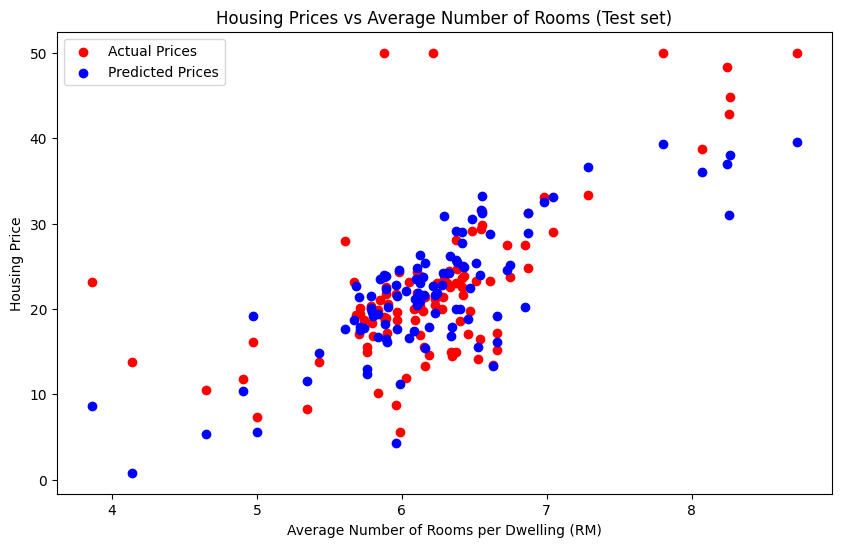

In [34]:
# Extract the 'RM' column (5th column)
X_train_rm = X_train[:, 5]
X_test_rm = X_test[:, 5]

plt.figure(figsize=(10, 6))
plt.scatter(X_test_rm, y_test, color='red', label='Actual Prices')
plt.scatter(X_test_rm, y_pred, color='blue', label='Predicted Prices')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Housing Prices vs Average Number of Rooms (Test set)')
plt.legend()
plt.show()